In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
df = pd.read_csv("adm_data_kag.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
print(len(df[df['University Rating'] == 1]))
print(len(df[df['University Rating'] == 2]))
print(len(df[df['University Rating'] == 3]))
print(len(df[df['University Rating'] == 4]))
print(len(df[df['University Rating'] == 5]))

26
107
133
74
60


In [29]:
df['University Rating'].value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


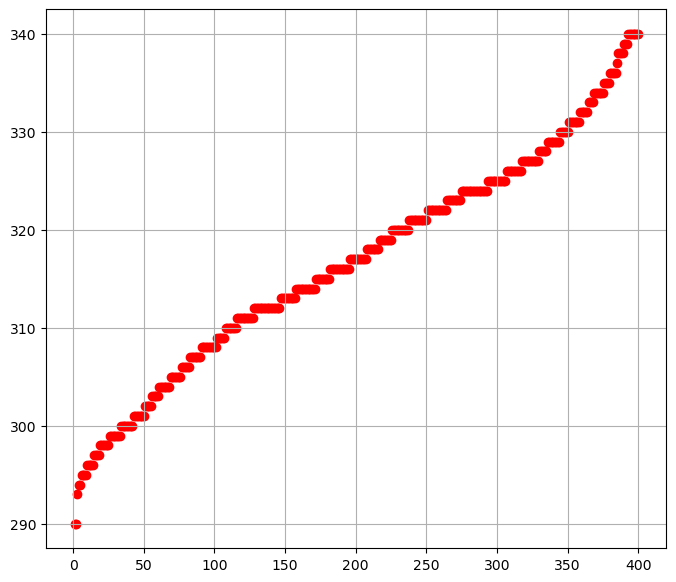

In [7]:
plt.figure(figsize=(8,7))
plt.scatter(df['Serial No.'],df.sort_values(by='GRE Score')['GRE Score'], color='red')
plt.grid()
plt.show()

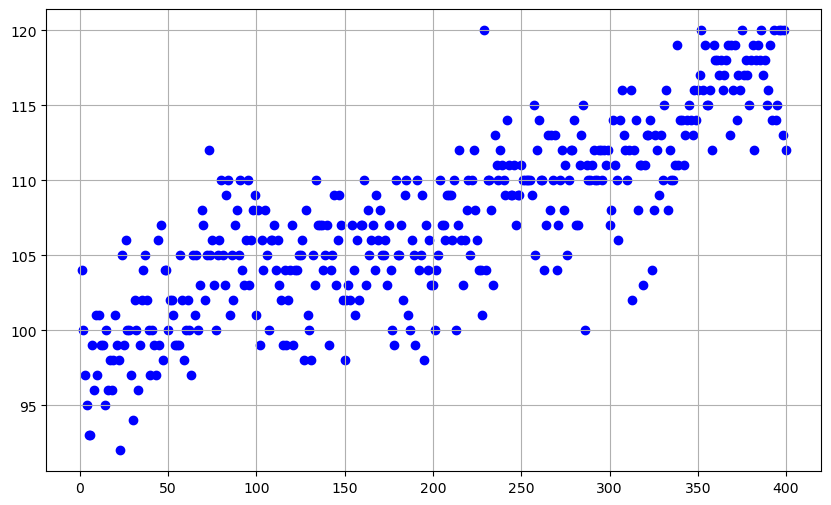

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(df['Serial No.'],df.sort_values(by='GRE Score')['TOEFL Score'], color='blue')
plt.grid()
plt.show()

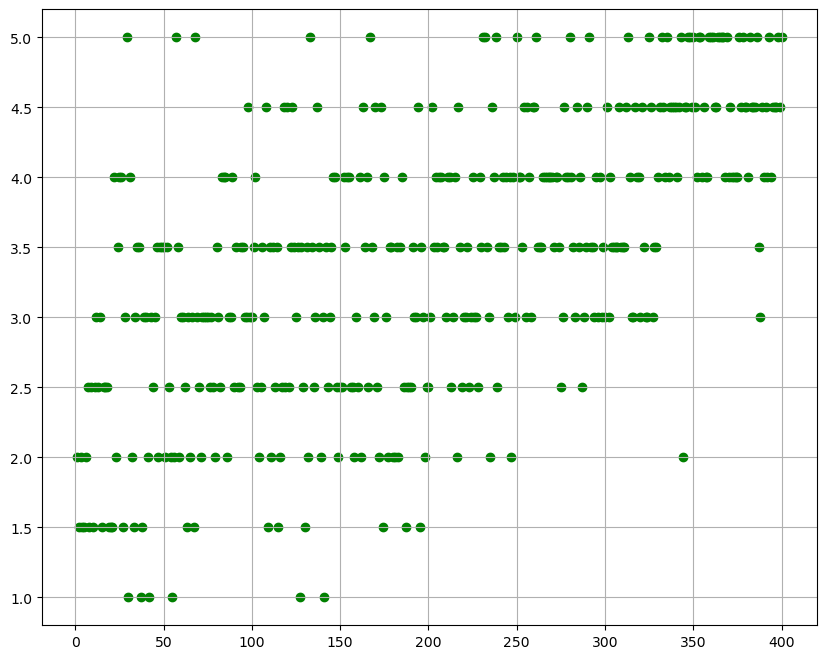

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(df['Serial No.'],df.sort_values(by='GRE Score')['SOP'], color='green')
plt.grid()
plt.show()

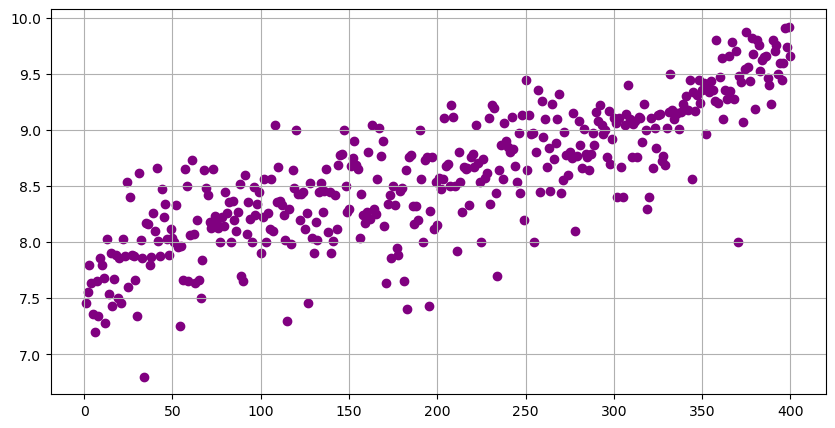

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(df['Serial No.'],df.sort_values(by='GRE Score')['CGPA'], color='purple')
plt.grid()
plt.show()

### Create Student Sets

In [11]:
# gre1 = Top 100
# gre2 = Next Top 100
# gre3 = Next Top 100
# gre4 = Next Top 100

# gre1 = GRE (326-340) 
#        TOEFL (108-120)
#        SOP (3-5)
#        CGPA (8.5-10)

# gre2 = GRE (316-325) 
#        TOEFL (103-113)
#        SOP (2.5-4.5)
#        CGPA (8-9.5)

# gre3 = GRE (307-315) 
#        TOEFL (100-110)
#        SOP (2-4)
#        CGPA (8-9)

# gre4 = GRE (290-306) 
#        TOEFL (95-105)
#        SOP (1-3.5)
#        CGPA (7-8.5)

In [12]:
print(len(df[df['GRE Score']>=326])/400)
print(len(df[(df['GRE Score']>=316) & (df['GRE Score']<326)])/400)
print(len(df[(df['GRE Score']>=307) & (df['GRE Score']<316)])/400)
print(len(df[df['GRE Score']<307])/400)

0.235
0.3125
0.2475
0.205


In [13]:
# Select 100 students of random category
students_category = np.random.choice((1,2,3,4), 100, p=[0.235,0.3125,0.2475,0.205])
students_category

array([4, 4, 1, 3, 4, 3, 1, 1, 2, 4, 2, 1, 2, 2, 3, 1, 4, 1, 1, 1, 1, 1,
       3, 1, 2, 3, 4, 1, 1, 4, 4, 1, 1, 3, 2, 3, 3, 2, 3, 1, 3, 3, 4, 3,
       1, 4, 1, 2, 3, 3, 4, 1, 3, 4, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3, 2, 4,
       3, 3, 4, 2, 2, 2, 3, 1, 2, 4, 2, 4, 2, 4, 2, 3, 1, 4, 2, 2, 1, 3,
       3, 4, 2, 2, 4, 1, 2, 2, 1, 2, 3, 3])

In [14]:
count_arr = np.bincount(students_category)
count_arr

array([ 0, 25, 29, 26, 20], dtype=int64)

In [15]:
df2 = pd.DataFrame(columns=['GRE','TOEFL','SOP','CGPA','UNIS'])
df2

,GRE,TOEFL,SOP,CGPA,UNIS


In [16]:
# Generate students with gre category 1
for i in range(count_arr[1]):
    row = {}
    row['GRE'] = random.randint(326,341)
    row['TOEFL'] = random.randint(108,121)
    row['SOP'] = np.random.choice((3,3.5,4,4.5,5))
    row['CGPA'] = round(random.uniform(8.5, 10), 2)
    row['UNIS'] = np.random.choice((1,2,3,4,5))
    df2 = df2.append(row,ignore_index=True)
#     print(row)
    
df2.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_14656\3714949405.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\3714949405.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\3714949405.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\3714949405.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Tem

,GRE,TOEFL,SOP,CGPA,UNIS
0,338.0,110.0,4.5,9.51,3.0
1,331.0,121.0,5.0,9.88,4.0
2,331.0,120.0,5.0,9.14,4.0
3,326.0,119.0,5.0,9.24,5.0
4,336.0,120.0,3.5,9.00,2.0


In [17]:
# gre2 = GRE (316-325) 
#        TOEFL (103-113)
#        SOP (2.5-4.5)
#        CGPA (8-9.5)

# Generate students with gre category 2
for i in range(count_arr[2]):
    row = {}
    row['GRE'] = random.randint(316,326)
    row['TOEFL'] = random.randint(103,113)
    row['SOP'] = np.random.choice((2.5,3,3.5,4,4.5))
    row['CGPA'] = round(random.uniform(8, 9.5), 2)
    row['UNIS'] = np.random.choice((1,2,3,4,5))
    df2 = df2.append(row,ignore_index=True)
#     print(row)
    
df2.tail()

C:\Users\admin\AppData\Local\Temp\ipykernel_14656\4127846610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\4127846610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\4127846610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\4127846610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local

,GRE,TOEFL,SOP,CGPA,UNIS
49,323.0,113.0,3.5,8.46,5.0
50,320.0,110.0,4.5,8.76,1.0
51,320.0,106.0,3.0,9.41,5.0
52,320.0,104.0,3.0,8.78,5.0
53,325.0,107.0,4.5,9.26,5.0


In [18]:
# gre3 = GRE (307-315) 
#        TOEFL (100-110)
#        SOP (2-4)
#        CGPA (8-9)

# Generate students with gre category 3
for i in range(count_arr[3]):
    row = {}
    row['GRE'] = random.randint(307,316)
    row['TOEFL'] = random.randint(100,111)
    row['SOP'] = np.random.choice((2,2.5,3,3.5,4))
    row['CGPA'] = round(random.uniform(8, 9), 2)
    row['UNIS'] = np.random.choice((1,2,3,4,5))
    df2 = df2.append(row,ignore_index=True)
#     print(row)
    
df2.tail()

C:\Users\admin\AppData\Local\Temp\ipykernel_14656\3645887417.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\3645887417.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\3645887417.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\3645887417.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local

,GRE,TOEFL,SOP,CGPA,UNIS
75,307.0,108.0,4.0,8.33,2.0
76,311.0,106.0,3.0,8.05,4.0
77,312.0,104.0,2.5,8.88,3.0
78,315.0,100.0,3.0,8.95,3.0
79,311.0,104.0,2.0,8.77,3.0


In [19]:
# gre4 = GRE (290-306) 
#        TOEFL (95-105)
#        SOP (1-3.5)
#        CGPA (7-8.5)

# Generate students with gre category 4
for i in range(count_arr[4]):
    row = {}
    row['GRE'] = random.randint(290,307)
    row['TOEFL'] = random.randint(95,105)
    row['SOP'] = np.random.choice((1,1.5,2,2.5,3,3.5))
    row['CGPA'] = round(random.uniform(7, 8.5), 2)
    row['UNIS'] = np.random.choice((1,2,3,4,5))
    df2 = df2.append(row,ignore_index=True)
#     print(row)
    
df2.tail()

C:\Users\admin\AppData\Local\Temp\ipykernel_14656\1940522120.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\1940522120.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\1940522120.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_14656\1940522120.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(row,ignore_index=True)
C:\Users\admin\AppData\Local

,GRE,TOEFL,SOP,CGPA,UNIS
95,306.0,96.0,3.5,7.28,2.0
96,294.0,96.0,3.5,8.05,2.0
97,299.0,102.0,3.0,7.62,1.0
98,304.0,101.0,2.5,7.28,4.0
99,299.0,96.0,3.0,7.12,3.0


In [20]:
df2

,GRE,TOEFL,SOP,CGPA,UNIS
0,338.0,110.0,4.5,9.51,3.0
1,331.0,121.0,5.0,9.88,4.0
2,331.0,120.0,5.0,9.14,4.0
3,326.0,119.0,5.0,9.24,5.0
4,336.0,120.0,3.5,9.00,2.0
...,...,...,...,...,...
95,306.0,96.0,3.5,7.28,2.0
96,294.0,96.0,3.5,8.05,2.0
97,299.0,102.0,3.0,7.62,1.0
98,304.0,101.0,2.5,7.28,4.0


In [21]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [22]:
df2.describe()

,GRE,TOEFL,SOP,CGPA,UNIS
count,100.000000,100.000000,100.00000,100.00000,100.000000
mean,317.280000,107.810000,3.33000,8.62820,3.110000
std,12.301006,5.767718,0.93263,0.64066,1.362521
min,290.000000,96.000000,1.00000,7.05000,1.000000
25%,309.000000,103.750000,2.50000,8.29750,2.000000
50%,317.000000,107.500000,3.50000,8.59000,3.000000
75%,325.250000,112.000000,4.00000,9.06250,4.000000
max,341.000000,121.000000,5.00000,9.88000,5.000000


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRE     100 non-null    float64
 1   TOEFL   100 non-null    float64
 2   SOP     100 non-null    float64
 3   CGPA    100 non-null    float64
 4   UNIS    100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [24]:
df2['GRE'] = df2['GRE'].astype('int16')
df2['TOEFL'] = df2['TOEFL'].astype('int8')
df2['SOP'] = df2['SOP'].astype('float16')
df2['CGPA'] = df2['CGPA'].astype('float16').apply(lambda x: round(x,2))
df2['UNIS'] = df2['UNIS'].astype('int8')
df2.head()

,GRE,TOEFL,SOP,CGPA,UNIS
0,338,110,4.5,9.51,3
1,331,121,5.0,9.88,4
2,331,120,5.0,9.14,4
3,326,119,5.0,9.24,5
4,336,120,3.5,9.00,2


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRE     100 non-null    int16  
 1   TOEFL   100 non-null    int8   
 2   SOP     100 non-null    float16
 3   CGPA    100 non-null    float64
 4   UNIS    100 non-null    int8   
dtypes: float16(1), float64(1), int16(1), int8(2)
memory usage: 1.5 KB


### Prediction Model 

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,[1,2,4,6,3]],df.iloc[:,8],test_size=0.1)

In [35]:
#We will save the model performance metrics in a DataFrame
Model = []
RMSE = []
R_sq = []
cv = KFold(5)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())
    
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train, y_train)

evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,0.066837,0.781081
1,Ridge Regression,0.066826,0.781243
2,Lasso Regression,0.122393,0.268297
3,K Neighbors Regressor,0.081412,0.674521
4,Decision Tree Regressor,0.100645,0.533947
5,Random Forest Regressor,0.072394,0.744578
6,Gradient Boosting Regressor,0.073929,0.730020
7,Adaboost Regressor,0.074962,0.718700


In [37]:
evaluation.sort_values(by=['RMSE','R Squared'], ascending=[True,False])

,Model,RMSE,R Squared
1,Ridge Regression,0.066826,0.781243
0,Linear Regression,0.066837,0.781081
5,Random Forest Regressor,0.072394,0.744578
6,Gradient Boosting Regressor,0.073929,0.730020
7,Adaboost Regressor,0.074962,0.718700
3,K Neighbors Regressor,0.081412,0.674521
4,Decision Tree Regressor,0.100645,0.533947
2,Lasso Regression,0.122393,0.268297


### Predict new students chances

In [39]:
model = Ridge()
model.fit(x_train,y_train)
df2['ADMIT_CHANCES'] = model.predict(df2)
df2.head(10)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GRE
- TOEFL
- UNIS
Feature names seen at fit time, yet now missing:
- GRE Score
- TOEFL Score
- University Rating

  warnings.warn(message, FutureWarning)


,GRE,TOEFL,SOP,CGPA,UNIS,ADMIT_CHANCES
0,338,110,4.5,9.51,3,0.905912
1,331,121,5.0,9.88,4,0.976073
2,331,120,5.0,9.14,4,0.877394
3,326,119,5.0,9.24,5,0.884852
4,336,120,3.5,9.00,2,0.842957
5,333,119,3.5,9.62,4,0.931832
6,334,112,3.5,9.10,3,0.840784
7,341,118,4.5,9.27,1,0.883350
8,334,110,3.5,9.44,2,0.871254
9,332,113,3.5,9.61,2,0.895772


In [40]:
df2['ADMIT_CHANCES'] = df2['ADMIT_CHANCES'].apply(lambda x: x*100)
df2['ADMIT_CHANCES'] = df2['ADMIT_CHANCES'].astype('int8')
df2.head()

,GRE,TOEFL,SOP,CGPA,UNIS,ADMIT_CHANCES
0,338,110,4.5,9.51,3,90
1,331,121,5.0,9.88,4,97
2,331,120,5.0,9.14,4,87
3,326,119,5.0,9.24,5,88
4,336,120,3.5,9.00,2,84


In [ ]:
df2.to_csv('StudentsAdmit.csv', index = False)